<a href="https://colab.research.google.com/github/Himanshucode77/Case_Study/blob/main/Yulu_Bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Brief Summary**


Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient.

#**Business Problem** -

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

# **The Business wants to know:**


1) To find which variables are significant in predicting the demand for shared electric cycles in the Indian market?

2) How well those variables describe the electric cycle demands

3) To check if Working Day has an effect on the number of electric cycles rented 

4) No. of cycles rented is similar or different in different weather

5) No. of cycles rented is similar or different in different season

6) Test to check if Weather is dependent on the season

#**Dataset Column Profiling:**

* datetime: datetime

* season: season (1: spring, 2: summer, 3: fall, 4: winter)

* holiday : weather day is a holiday or not (extracted from ttp://dchr.dc.gov/page/holidayschedule)

* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

* weather:
  * 1: Clear, Few clouds, partly cloudy, partly cloudy
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered
clouds
  * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

* temp: temperature in Celsius

* atemp: feeling temperature in Celsius

* humidity: humidity

* windspeed: wind speed

* casual: count of casual users

* registered: count of registered users

* count: count of total rental bikes including both casual and registered

#**Analyzing the data**

In [ ]:
#importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from scipy.stats import levene
from scipy.stats import shapiro
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Read Data**

In [ ]:
df= pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")


In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Identification of Variable and data types**

In [ ]:
# Number of records with No Null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#Getting the shape of the data given.
df.shape

(10886, 12)

In [ ]:
#No. and names of columns in the given data.
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

## **Conversion of categorical attributes**

In [ ]:
categorical_col = ["season", "holiday", "workingday", "weather"]


In [ ]:
#changing season,holiday,workingday,weather category from 'int' to 'category'.
df[categorical_col] = df[categorical_col].astype("category")


## **Analysing the basic metrics**

In [ ]:
#Generate descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000
count,10886.0,191.574132,181.144454,1.00,42.0000,145.000,284.0000,977.0000


In [ ]:
#Generate descriptive statistics of categorical features.
df.describe(include='category').T

,count,unique,top,freq
season,10886,4,4,2734
holiday,10886,2,0,10575
workingday,10886,2,1,7412
weather,10886,4,1,7192


• The minimum temperature is 0.82, maximum is 41 and average is 20.23.

• The minimum feeling temperature is 0.76, maximum is 45.45 and average is 23.65.

• The minimum humidity is 0, maximum is 100 and average is 61.88.

• The minimum windspeed is 0, maximum is 56.99 and average is 12.79.

• The minimum casual customers are 0, maximum are 367 and average count is 36.

• The minimum registered customers are 0, maximum are 886 and average count is 155.55.

• There are 4 seaasons.

• There are 4 weathers.

• 2 categories for holiday - holiday or not

• 2 categories for workingday - weekday or holiday/weekend

**Analysing Null Values**

In [ ]:
 #checking null values in every column of our data
 df.isna().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

In [ ]:
df.isnull().sum()/len(df)*100

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

Since there is all Non Null Values, We don't have missing data and no need of data imputations.

# **Relation between the dependent and independent variable** 

**Dependent: “Count”** 

**Independent: Workingday, Weather, Season , Holiday .**

In [ ]:
for col in categorical_col:
  print("Relation :", col, "\n")
  display(df.groupby([col])['count'].describe())
  print()

Relation : season 



,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0



Relation : holiday 



,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0



Relation : workingday 



,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0



Relation : weather 



,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


* Mean values for both Working And Non-Working days are Significantly same.

* Median for Working day is more than non working.

* Mean And Median values for both every weather and Yulu rental count is statistically different amomg different weather.

* Mean And Median values for both every season and Yulu rental count is statistically similar amomg different seasons but less for season 1.

# **Non-Graphical Analysis: Value counts and unique attributes**

In [ ]:
#number of unique values in our data
for col in df:
  print( '{} : {}'.format(col, df[col].nunique()))

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822


In [ ]:
for column in categorical_col:
  print(df[column].value_counts())

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64
0    10575
1      311
Name: holiday, dtype: int64
1    7412
0    3474
Name: workingday, dtype: int64
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


* We have almost equal amount of count for every seasons and, having a good
amout of distributions for each seasons.

* It is observed that the weather 4 has only 1 entries .

* It is observerd that for different weather different count of distribution is there amongs the population .

* It is observerd that most of the distribution of counts are in working day
and less than a half for Non Working day .

* It is observerd that, for Holidays there is less distribution and
for normal days we have large distribution .

# **Outliers Detection**

In [ ]:
#code to detect the outliers in different features.
def detectoutlier(df,colname):
    Q3 = df[colname].quantile(0.75)
    Q1 = df[colname].quantile(0.25)
    IQR = Q3-Q1
    outlier_left = Q1 - (1.5 * IQR)
    outlier_right = Q3 + (1.5 * IQR)

    return df[(df[colname]<= outlier_left) | (df[colname] >= outlier_right)]

##**Count**

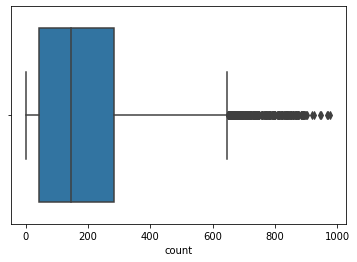

In [ ]:
sns.boxplot(df["count"])

In [ ]:
detectoutlier(df,"count")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6611,2012-03-12 18:00:00,1,0,1,2,24.60,31.060,43,12.9980,89,623,712
6634,2012-03-13 17:00:00,1,0,1,1,28.70,31.820,37,7.0015,62,614,676
6635,2012-03-13 18:00:00,1,0,1,1,28.70,31.820,34,19.9995,96,638,734
6649,2012-03-14 08:00:00,1,0,1,1,18.04,21.970,82,0.0000,34,628,662
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.820,28,6.0032,140,642,782
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2012-12-11 08:00:00,4,0,1,2,13.94,15.150,61,19.9995,16,708,724
10702,2012-12-12 08:00:00,4,0,1,2,10.66,12.880,65,11.0014,18,670,688
10726,2012-12-13 08:00:00,4,0,1,1,9.84,11.365,60,12.9980,24,655,679
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0000,10,652,662


##**temp**

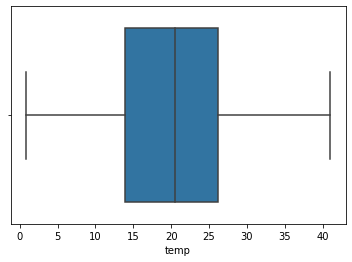

In [ ]:
sns.boxplot(df["temp"])

In [ ]:

detectoutlier(df,"temp")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


##**atemp**

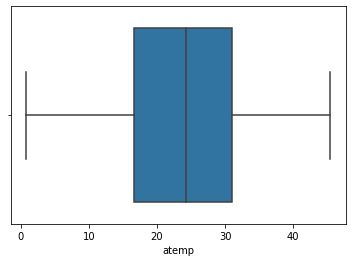

In [ ]:
sns.boxplot(df["atemp"])

In [ ]:
detectoutlier(df,"atemp")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


## **humidity**

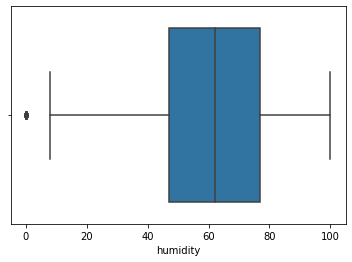

In [ ]:
sns.boxplot(df["humidity"])

In [ ]:
detectoutlier(df,"humidity")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1091,2011-03-10 00:00:00,1,0,1,3,13.94,15.910,0,16.9979,3,0,3
1092,2011-03-10 01:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,2,2
1093,2011-03-10 02:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,1,1
1094,2011-03-10 05:00:00,1,0,1,3,14.76,17.425,0,12.9980,1,2,3
1095,2011-03-10 06:00:00,1,0,1,3,14.76,16.665,0,22.0028,0,12,12
1096,2011-03-10 07:00:00,1,0,1,3,15.58,19.695,0,15.0013,1,36,37
1097,2011-03-10 08:00:00,1,0,1,3,15.58,19.695,0,19.0012,1,43,44
1098,2011-03-10 09:00:00,1,0,1,3,16.40,20.455,0,15.0013,1,23,24
1099,2011-03-10 10:00:00,1,0,1,3,16.40,20.455,0,11.0014,0,17,17
1100,2011-03-10 11:00:00,1,0,1,3,16.40,20.455,0,16.9979,6,5,11


## **windspeed**

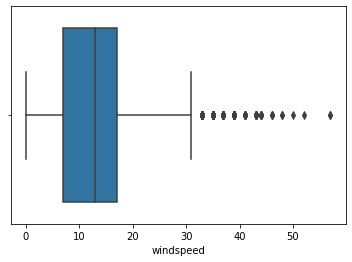

In [ ]:
sns.boxplot(df["windspeed"])

In [ ]:
detectoutlier(df,"windspeed")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
175,2011-01-08 14:00:00,1,0,0,1,8.20,8.335,32,32.9975,12,83,95
178,2011-01-08 17:00:00,1,0,0,1,6.56,6.060,37,36.9974,5,64,69
194,2011-01-09 09:00:00,1,0,0,1,4.92,3.790,46,35.0008,0,19,19
196,2011-01-09 11:00:00,1,0,0,1,6.56,6.060,40,35.0008,2,47,49
265,2011-01-12 12:00:00,1,0,1,1,8.20,7.575,47,39.0007,3,52,55
...,...,...,...,...,...,...,...,...,...,...,...,...
10013,2012-11-02 14:00:00,4,0,1,2,16.40,20.455,40,32.9975,63,199,262
10154,2012-11-08 12:00:00,4,0,1,1,16.40,20.455,24,32.9975,33,202,235
10263,2012-11-13 01:00:00,4,0,1,3,18.04,21.970,88,43.0006,0,5,5
10540,2012-12-05 14:00:00,4,0,1,1,19.68,23.485,33,32.9975,39,179,218


## **casual**

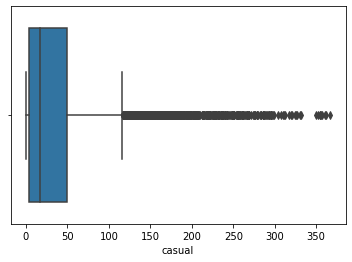

In [ ]:
sns.boxplot(df["casual"])

In [ ]:
detectoutlier(df,"casual")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1173,2011-03-13 14:00:00,1,0,0,1,18.86,22.725,41,19.9995,144,106,250
1174,2011-03-13 15:00:00,1,0,0,1,19.68,23.485,39,22.0028,149,155,304
1175,2011-03-13 16:00:00,1,0,0,1,18.86,22.725,41,26.0027,124,132,256
1311,2011-03-19 12:00:00,1,0,0,1,18.86,22.725,33,27.9993,126,141,267
1312,2011-03-19 13:00:00,1,0,0,1,20.50,24.240,34,31.0009,174,127,301
...,...,...,...,...,...,...,...,...,...,...,...,...
10610,2012-12-08 12:00:00,4,0,0,2,16.40,20.455,87,15.0013,122,364,486
10611,2012-12-08 13:00:00,4,0,0,2,16.40,20.455,87,11.0014,148,399,547
10612,2012-12-08 14:00:00,4,0,0,2,16.40,20.455,87,19.0012,164,378,542
10613,2012-12-08 15:00:00,4,0,0,1,17.22,21.210,82,11.0014,167,374,541


## **registered**

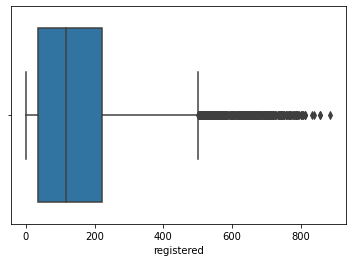

In [ ]:
sns.boxplot(df["registered"])

In [ ]:
detectoutlier(df,"registered")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1987,2011-05-09 17:00:00,2,0,1,1,25.42,31.060,38,16.9979,59,539,598
2011,2011-05-10 17:00:00,2,0,1,1,26.24,31.060,33,0.0000,79,532,611
2059,2011-05-12 17:00:00,2,0,1,2,26.24,31.060,57,12.9980,54,540,594
2179,2011-05-17 17:00:00,2,0,1,1,25.42,30.305,65,27.9993,83,521,604
2371,2011-06-06 17:00:00,2,0,1,1,31.98,34.090,33,19.0012,63,516,579
...,...,...,...,...,...,...,...,...,...,...,...,...
10855,2012-12-18 17:00:00,4,0,1,1,16.40,20.455,47,30.0026,39,533,572
10856,2012-12-18 18:00:00,4,0,1,1,15.58,19.695,46,22.0028,13,512,525
10870,2012-12-19 08:00:00,4,0,1,1,9.84,12.880,87,7.0015,13,665,678
10879,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562


# **Visual Univariate Analysis**

##Visualization of continuous variable

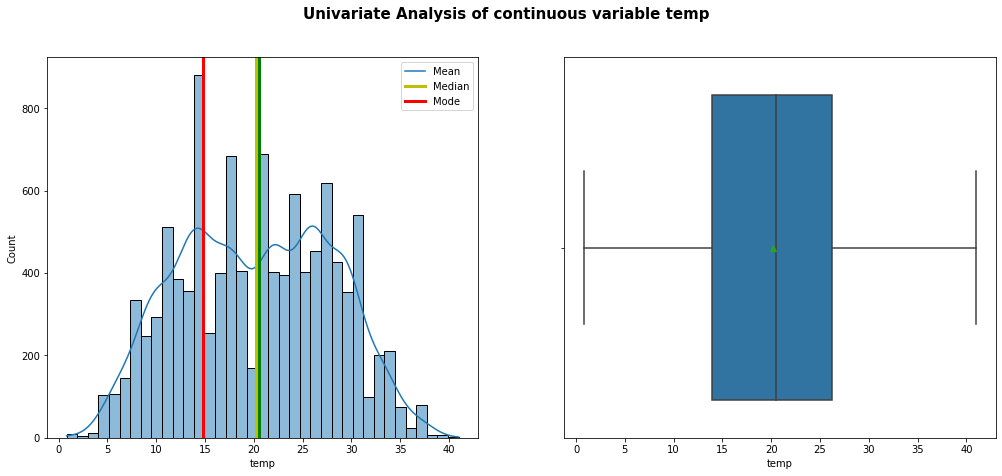

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(17, 7))
fig.suptitle("Univariate Analysis of continuous variable temp", fontsize=15,fontweight='bold')
#showing histplot.
sns.histplot(df, x="temp", ax=axs[0], kde=True)
#showing mean
axs[0].axvline(df['temp'].mean(), color='y', linewidth='3')
#showing mode
axs[0].axvline(df['temp'].mode()[0], color='r', linewidth='3')
#showing median
axs[0].axvline(df['temp'].median(), color='g', linewidth='3')
#showing legend on the plot
axs[0].legend({'Mean':df['temp'].mean(),'Median':df['temp'].median(),'Mode':df['temp'].mode()})
sns.boxplot(data=df, x="temp", showmeans="True", ax=axs[1])

• Range of 'temp' is in between 0 and 40

• Minimum temp is around 0 and Maximum around 40

• Average temp is around 20.

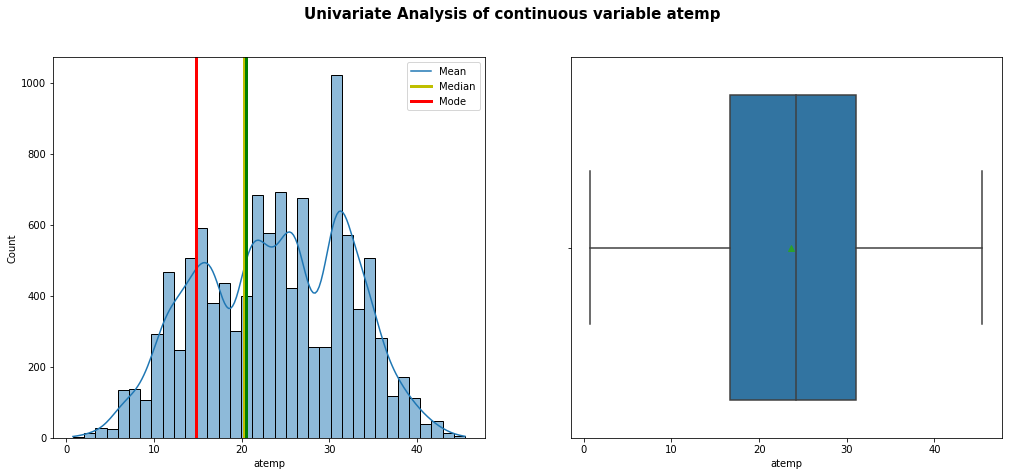

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(17, 7))
fig.suptitle("Univariate Analysis of continuous variable atemp", fontsize=15,fontweight='bold')
sns.histplot(df, x="atemp", ax=axs[0], kde=True)
#showing mean
axs[0].axvline(df['temp'].mean(), color='y', linewidth='3')
#showing mode
axs[0].axvline(df['temp'].mode()[0], color='r', linewidth='3')
#showing median
axs[0].axvline(df['temp'].median(), color='g', linewidth='3')
#showing legend on the plot
axs[0].legend({'Mean':df['atemp'].mean(),'Median':df['atemp'].median(),'Mode':df['atemp'].mode()})
sns.boxplot(data=df, x="atemp", showmeans="True", ax=axs[1])

•  Range of 'atemp' ( feeling temp ) is in between 0 and 45.

• Minimum temp is around 0 and Maximum aroun 45.

• Average temp is around 23.

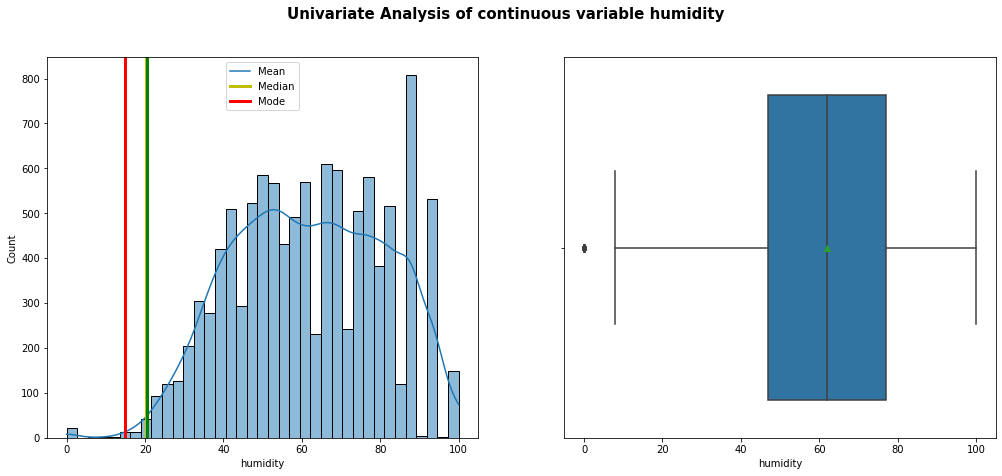

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(17, 7))
fig.suptitle("Univariate Analysis of continuous variable humidity",fontsize=15, fontweight='bold')
sns.histplot(df, x="humidity", ax=axs[0], kde=True)
#showing mean
axs[0].axvline(df['temp'].mean(), color='y', linewidth='3')
#showing mode
axs[0].axvline(df['temp'].mode()[0], color='r', linewidth='3')
#showing median
axs[0].axvline(df['temp'].median(), color='g', linewidth='3')
#showing legend on the plot
axs[0].legend({'Mean':df['humidity'].mean(),'Median':df['humidity'].median(),'Mode':df['humidity'].mode()})
sns.boxplot(data=df, x="humidity", showmeans="True", ax=axs[1])

• Range of humidity is in between 0 and 100.

• Average humidity is around 60.

• There are few values around 0, which are outliers.

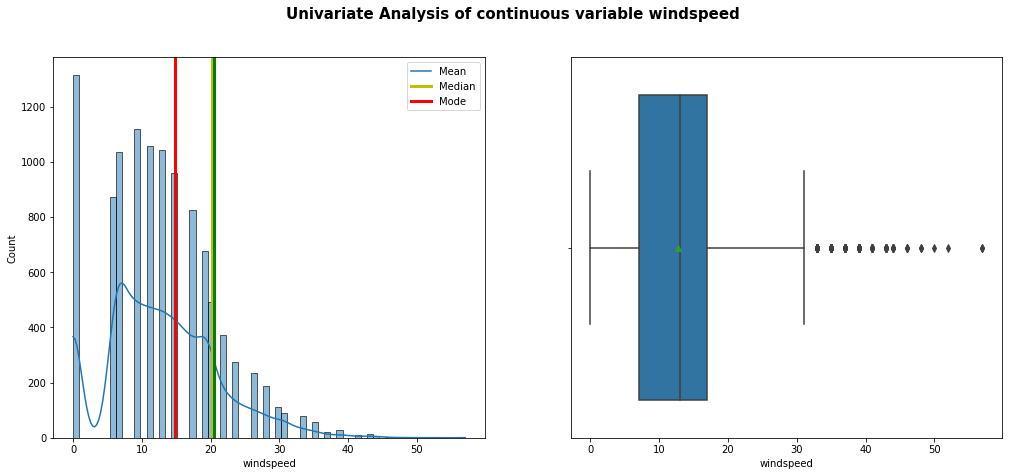

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(17, 7))
fig.suptitle("Univariate Analysis of continuous variable windspeed",fontsize=15, fontweight='bold')
sns.histplot(df, x="windspeed", ax=axs[0], kde=True)
#showing mean
axs[0].axvline(df['temp'].mean(), color='y', linewidth='3')
#showing mode
axs[0].axvline(df['temp'].mode()[0], color='r', linewidth='3')
#showing median
axs[0].axvline(df['temp'].median(), color='g', linewidth='3')
#showing legend on the plot
axs[0].legend({'Mean':df['windspeed'].mean(),'Median':df['windspeed'].median(),'Mode':df['windspeed'].mode()})
sns.boxplot(data=df, x="windspeed", showmeans="True", ax=axs[1])

• Range of 'windspeed' is between 0 and 50.

• Average windspeed is around 12.

• There are many outliers, windspeeds greater than 30 are outliers.

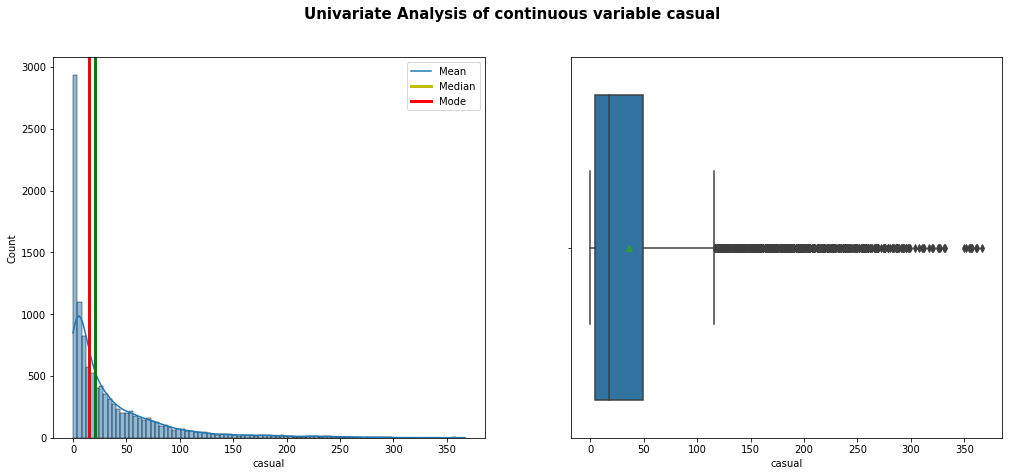

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(17, 7))
fig.suptitle("Univariate Analysis of continuous variable casual", fontsize=15,fontweight='bold')
sns.histplot(df, x="casual", ax=axs[0], kde=True)
#showing mean
axs[0].axvline(df['temp'].mean(), color='y', linewidth='3')
#showing mode
axs[0].axvline(df['temp'].mode()[0], color='r', linewidth='3')
#showing median
axs[0].axvline(df['temp'].median(), color='g', linewidth='3')
#showing legend on the plot
axs[0].legend({'Mean':df['casual'].mean(),'Median':df['casual'].median(),'Mode':df['casual'].mode()})
sns.boxplot(data=df, x="casual", showmeans="True", ax=axs[1])

• Range of 'casual' customers are between 0 and 350 on a given day.

• Almost 120 or more customers, rent an electrical cycles are considered to be outlier.

• Average customer on a day are around 36.

• Data is right skewed.

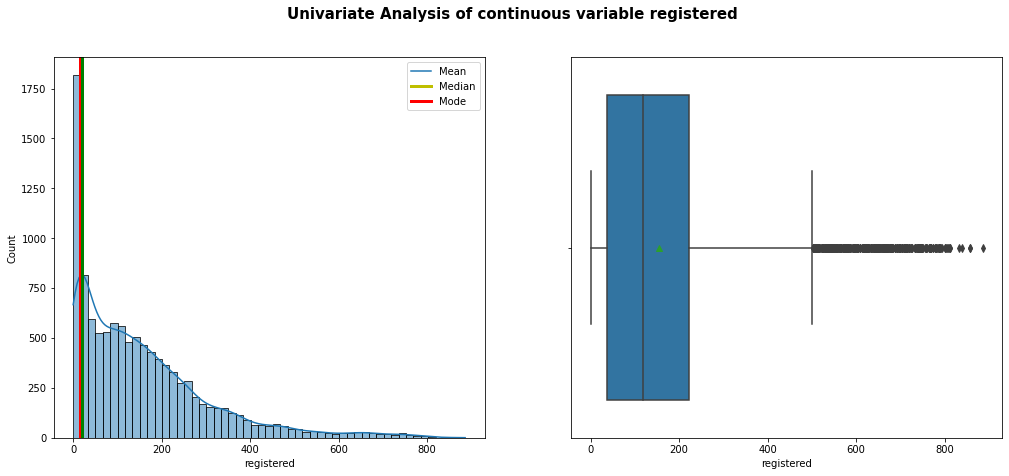

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(17, 7))
fig.suptitle("Univariate Analysis of continuous variable registered",fontsize=15, fontweight='bold')
sns.histplot(df, x="registered", ax=axs[0], kde=True)
#showing mean
axs[0].axvline(df['temp'].mean(), color='y', linewidth='3')
#showing mode
axs[0].axvline(df['temp'].mode()[0], color='r', linewidth='3')
#showing median
axs[0].axvline(df['temp'].median(), color='g', linewidth='3')
#showing legend on the plot
axs[0].legend({'Mean':df['registered'].mean(),'Median':df['registered'].median(),'Mode':df['registered'].mode()})
sns.boxplot(data=df, x="registered", showmeans="True", ax=axs[1])

• Range of 'registered' customer on any day are between 0 and 890.

• Average registered customer who use electrical cycle are 155.

• 500 or more registered customers who rent electrical cycle on any given day are considered to be outlier.

• Data is right skewed.

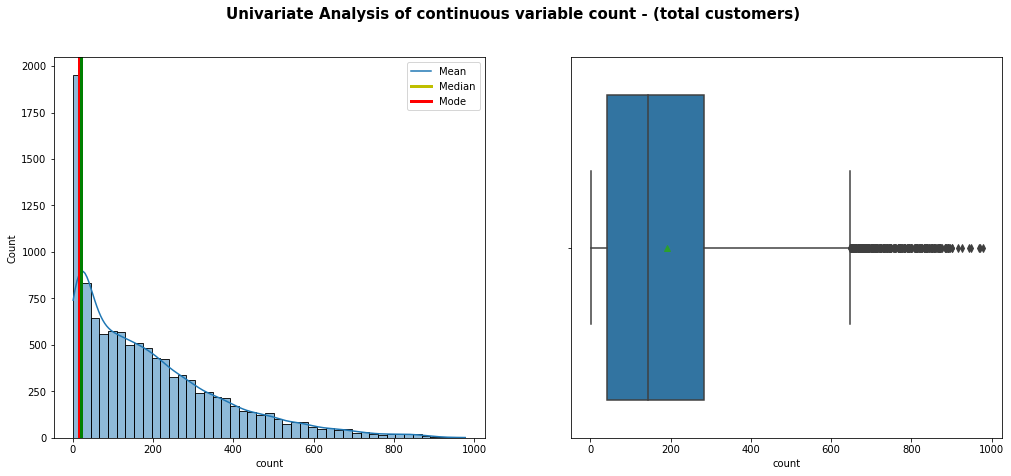

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(17, 7))
fig.suptitle("Univariate Analysis of continuous variable count - (total customers)", fontsize=15, fontweight='bold')
sns.histplot(df, x="count", ax=axs[0], kde=True)
#showing mean
axs[0].axvline(df['temp'].mean(), color='y', linewidth='3')
#showing mode
axs[0].axvline(df['temp'].mode()[0], color='r', linewidth='3')
#showing median
axs[0].axvline(df['temp'].median(), color='g', linewidth='3')
#showing legend on the plot
axs[0].legend({'Mean':df['count'].mean(),'Median':df['count'].median(),'Mode':df['count'].mode()})
sns.boxplot(data=df, x="count", showmeans="True", ax=axs[1])

• Range of total customers on any day are between 0 and 1000.

• Average customers who use electric cycles are 155.

• 620 or more customers who rent electrical cycle on any given day are considered to be outlier

• Data is right skewed.

##Comments on the distribution of the variables and relationship between them.

1. Temp -> Data is centered around mean but Gaussian.
2. Atemp -> Data is centered around mean but Gaussian.
3. Humidity -> Data is left skewed.
4. Windspeed -> Data is right skewed.
5. Casual -> Data is right skewed.
6. Registered -> Data is right skewed.
7. Count -> Data is right skewed.


## Visualization of Categorical variable

In [ ]:
#Countplot & Pieplot.
def Categorical_feature(col_data):
  fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,5))
  fig.suptitle(col_data.name+' wise Yulu bike rented',fontsize=15, va= 'bottom')
  #countplot
  sns.countplot(col_data,ax=ax[0])
  #pieplot
  col_data.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
  plt.tight_layout()

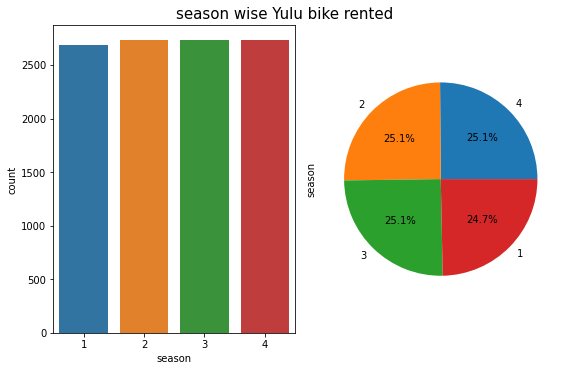

In [ ]:
Categorical_feature(df['season'])

From visual analysis,

We can see that for every season there is almost equal amount of distribution
among population.



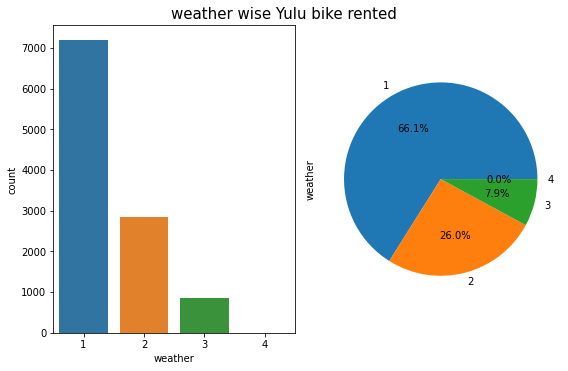

In [ ]:
Categorical_feature(df['weather'])

From visual analysis,

We can see that for different weather there is different amount of
distribution among population.

**More than 66% population of yulu bike rented is for season 1**

**Sales of yulu bike is decreased for season 2 and only 26 % of population users intrested rate is observed** 

**For, season 3 there is high fall in the yulu bike rented And only 8 % user intrested rate is observed**

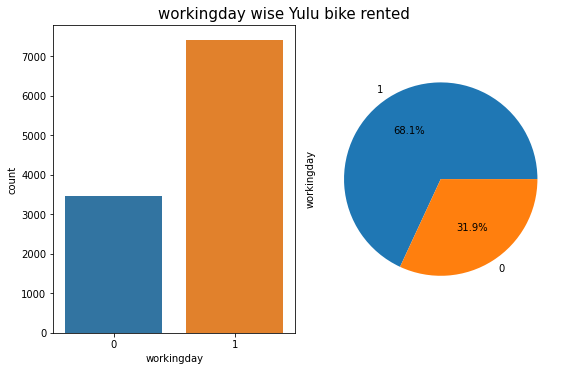

In [ ]:
Categorical_feature(df['workingday'])

From visual analysis,

We can see that working day has an Impact on yulu bike rentals.

**68% of population ,where yulu bike rented is for Working day** .

**Only , 32% of population ,where yulu bike rented is for Non-Working day** .

## Distribution of categorical variables

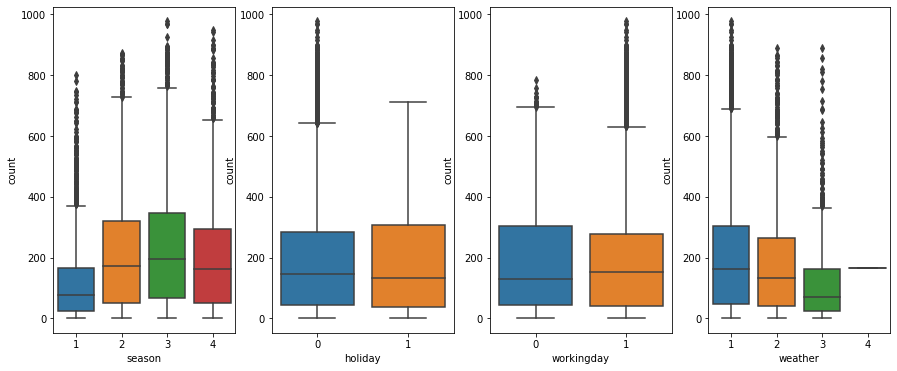

In [ ]:
fig, axs = plt.subplots( 1, 4, figsize=(15,6) )
sns.boxplot(x='season', y='count', data=df, ax=axs[0])
sns.boxplot(x='holiday', y='count', data=df, ax=axs[1])
sns.boxplot(x='workingday', y='count', data=df, ax=axs[2])
sns.boxplot(x='weather', y='count', data=df, ax=axs[3])

**Season-count distribution** -
 
Median for season 2,3 and 4 are very close, 

so we can’t clearly say that the season affects the number of cycle rented with confidence. 

    * Season 1 - Spring, any value above 374 are outliers, q1 = 24 and q3 = 164.
    * Season 2 - Summer, any value above 729 are outliers, q1 = 49 and q3 = 321. 
    * Season 3 - fall, any value above 765.5 are outliers, q1 = 68 and q3 = 347. 
    * Season 4 - winter, any value above 658.5 are outliers, q1 = 51 and q3 = 294.

**Holiday-count distribution** - 

Median for holiday and working day is very close, 

so we can’t clearly say that the Holiday affects the number of cycle rented with confidence. 

    * Holiday 0 - Non-Holiday, any value above 643 are outliers, q1 = 43 and q3 = 283.

    * Holiday 1 - Holiday, any value above 712.25 are outliers, q1 = 38.5 and q3 = 308.
    
    

**Working-count distribution** - 

Median for working day and weekend is very close, 

so we can’t clearly say that the Working day affects the number of cycle rented with confidence. 

     * Working day 0 - Non-workingday, any value above 694 are outliers, q1 = 44 and q3 = 304.

     * Working day 1 - workingday, any value above 631 are outliers, q1 = 41 and q3 =277.

**Weather-count distribution** - 

Median for weather 1 and weather 2 is also close, 

so we can’t clearly say that the weather affects the number of cycle rented with confidence. 

     * Weather 1 - any value above 690 are outliers, q1 = 48 and q3 = 305. 
     * Weather 2 - any value above 598 are outliers, q1 = 41 and q3 = 264. 
     * Weather 3 - any value above 368 are outliers, q1 = 23 and q3 = 161.b 
     * Weather 4 - any value above 164 are outliers, q1 = 164 and q3 = 164.

# **Visual Bivariate Analysis**

([<matplotlib.axis.XTick at 0x7f6230fba2d0>,
 [Text(0, 0, 'Non-working'), Text(0, 0, 'working')])

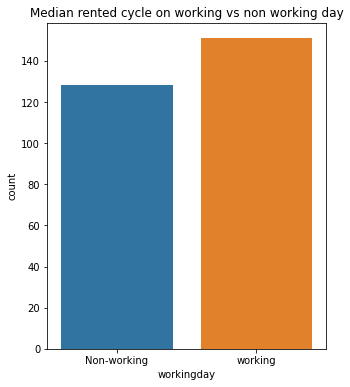

In [ ]:
plt.figure(figsize=(5, 6))
ax = sns.barplot(x = 'workingday',y = 'count',data = df,estimator = np.median,ci = 0)
plt.title('Median rented cycle on working vs non working day')
plt.xticks([0, 1],['Non-working', 'working'])
# Conclusion:- People do rent more cycles on workinday day than non-working day

([<matplotlib.axis.XTick at 0x7f6230fb1210>,
 [Text(0, 0, 'spring'),
  Text(0, 0, 'summer'),
  Text(0, 0, 'fall'),
  Text(0, 0, 'winter')])

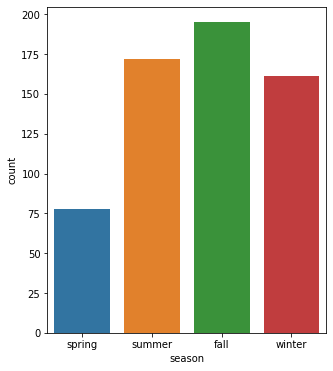

In [ ]:
plt.figure(figsize=(5, 6))
ax = sns.barplot(x = 'season',y = 'count',data = df,estimator = np.median,ci = 0)
plt.xticks([0,1,2,3],['spring', 'summer', 'fall', 'winter'])
# Conclusion:- People do rent more cycles on fall than other seasons

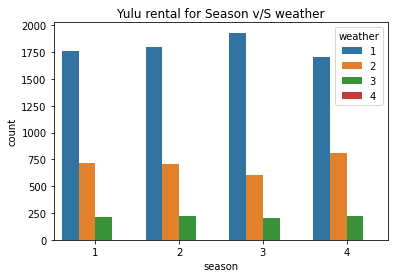

In [ ]:
sns.countplot(x='season',hue='weather',data=df)
plt.title(' Yulu rental for Season v/S weather ')
plt.show()

* For Every season , Weather 1 had Constantly higher count than weather 2 & 3.

* So,We can say that for weather is dependent on season and weather 1 has observed more yulu bikes rented as compare to other weathers.

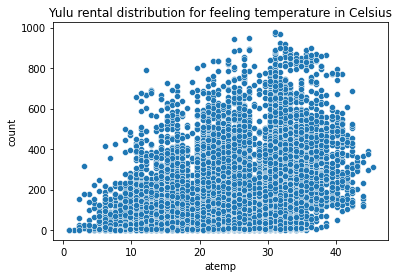

In [ ]:
sns.scatterplot(data=df, x ='atemp', y='count')
plt.title(' Yulu rental distribution for feeling temperature in Celsius ')
plt.show()

* Feeling temperature in Celsius range from 20 to 45 have more distribution Count means more yulu bikes are rented .

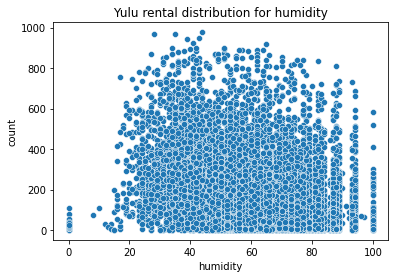

In [ ]:
sns.scatterplot(data=df, x ='humidity', y='count')
plt.title(' Yulu rental distribution for humidity ')
plt.show()

* Humidity range from 35 to 90 have more distribution Count means more yulu bikes are rented .

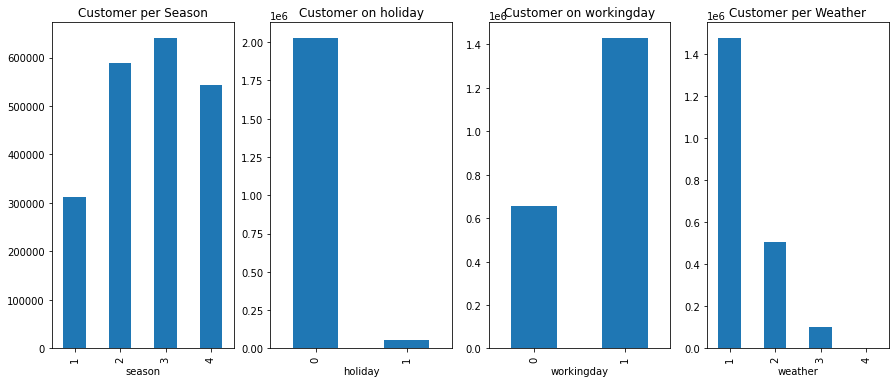

In [ ]:
fig, axs = plt.subplots(1,4,figsize=(15,6))
dfS = df.groupby('season')['count'].sum().plot.bar(ax=axs[0], title='Customer per Season')
dfH = df.groupby('holiday')['count'].sum().plot.bar(ax=axs[1], title='Customer on holiday')
dfWD = df.groupby('workingday')['count'].sum().plot.bar(ax=axs[2], title='Customer on workingday')
dfW = df.groupby('weather')['count'].sum().plot.bar(ax=axs[3], title='Customer per Weather')

• Number of cycles rented are different in different season.

• Holiday has effect on number of cycles rented.

• Working day has effect on number of cycles rented.

• Number of cycles rented are different in different weather.

**<font color='33A2FF'><b>CORRELATION MATRIX**

In [ ]:
df_corr = df.corr()
df_corr

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


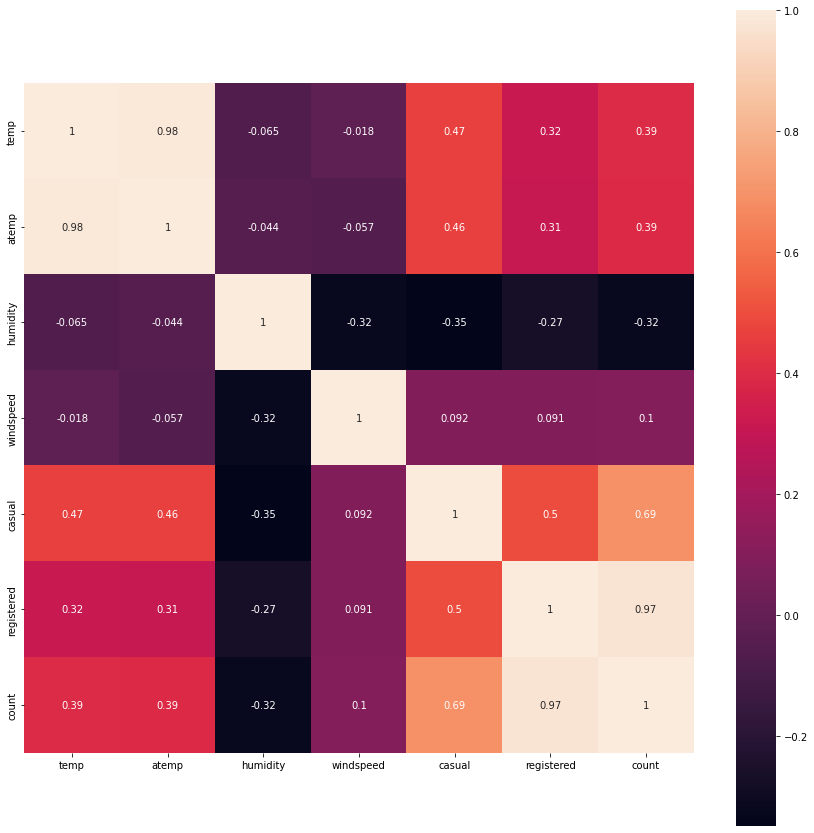

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(method='pearson'), square=True,annot=True)

* Yulu Bike rental for registered user is more colrrelated than a casual user.

* Temperature is significantly correlated with casual and registered users.

* weather and humidity are also correlated with each other.

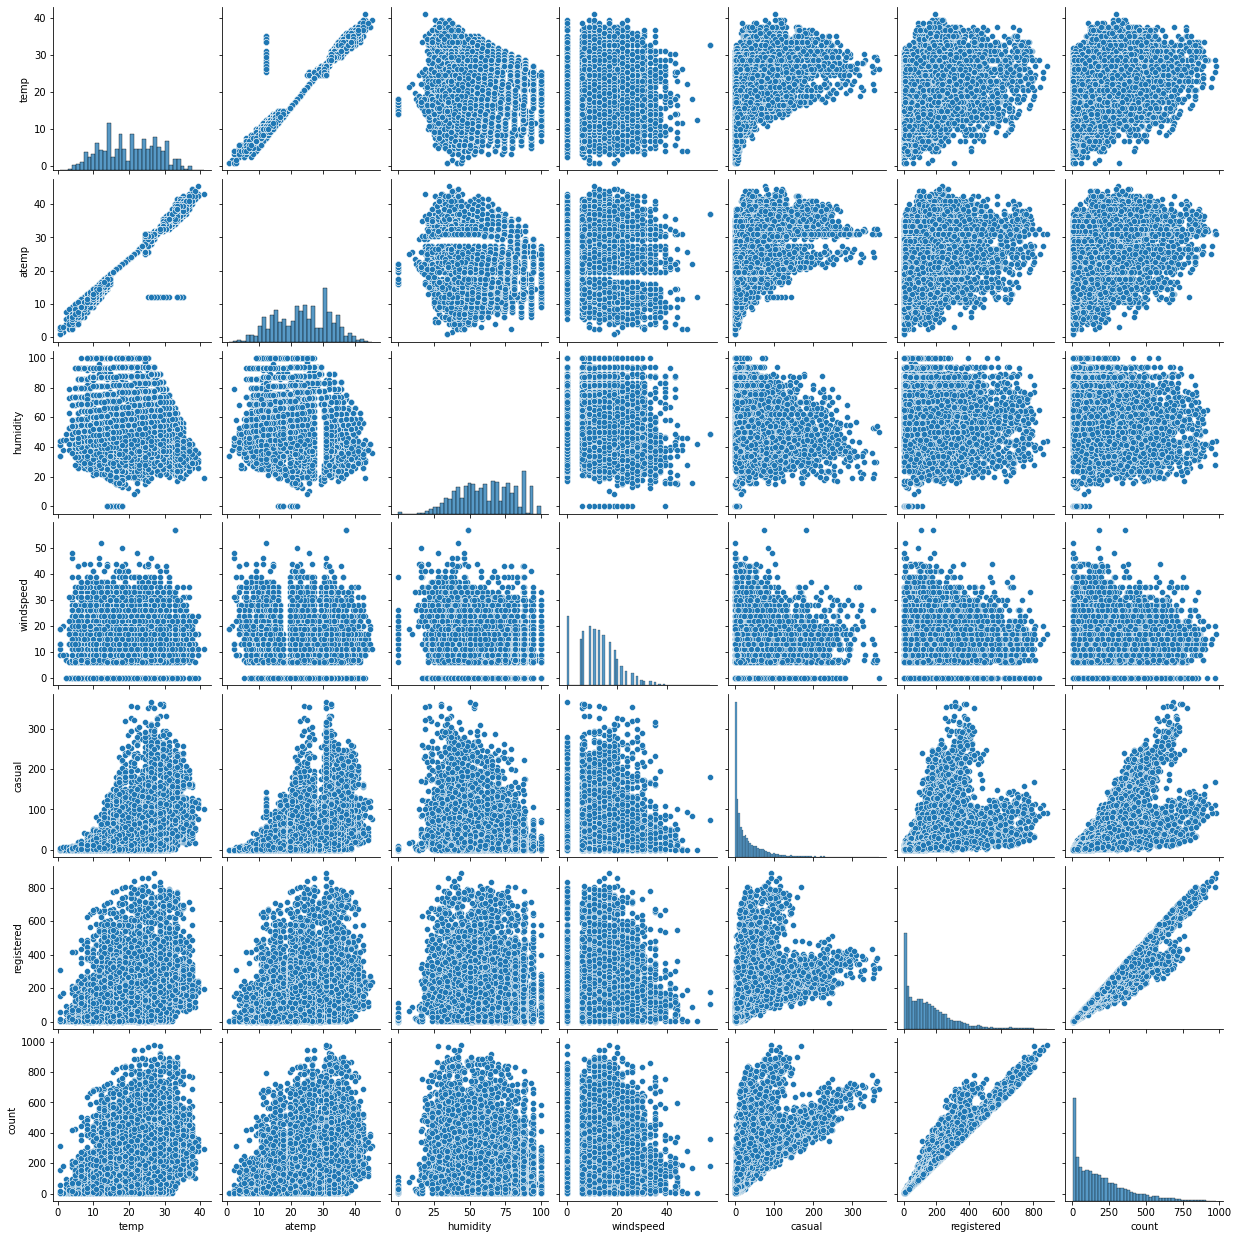

In [ ]:
sns.color_palette("pastel")
sns.pairplot(df)
plt.show()

In [ ]:
#converting datetime feature category to datetime and then into year and month. 
for col in ["datetime"]:
  df[col] = pd.to_datetime(df[col])
  df[col + '_year'] = df[col].dt.year
  df[col + '_month'] = df[col].dt.month

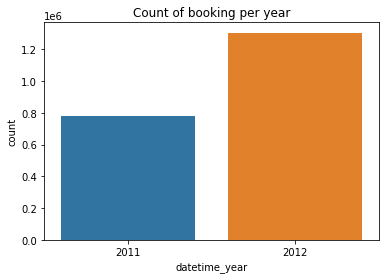

In [ ]:
#barplot for year and month wise analysis.
for col in ["datetime"]:
  year_data = df.groupby([col + '_year'])["count"].sum() 
  sns.barplot(data = year_data.reset_index(), x = col + '_year', y = "count") 
  plt.title('Count of booking per year') 
  plt.show()

We have only two year's data (2011 & 2012).

& Year 2012 has almost double no. of customers in compared to 2011.

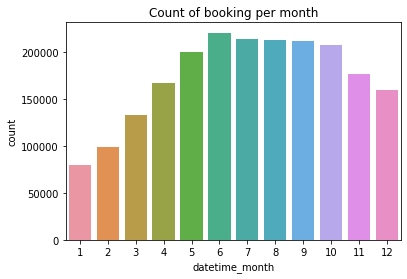

In [ ]:
#barplot for year and month wise analysis.
for col in ["datetime"]:
  month_data = df.groupby([col + '_month'])["count"].sum() 
  sns.barplot(data = month_data.reset_index(), x = col + '_month', y = "count") 
  plt.title('Count of booking per month') 
  plt.show()

Month wise total booking are highest for June month.

Total Bookings for month May to October are same.

Jan,Feb,March,April,May have Total bookings in increasing order.

Total bookings for Jan month is lowest.

#**Boxcox Transformation on 'count' data.**

In [ ]:
fit_data, fit_lambda = stats.boxcox(df['count'])
df['logarithmic_count'] = fit_data

In [ ]:
df['logarithmic_count']

0         4.433145
1         6.982674
2         6.292274
3         3.950910
4         0.000000
           ...    
10881    16.704819
10882    14.725759
10883    12.799393
10884    11.521965
10885     9.851258
Name: logarithmic_count, Length: 10886, dtype: float64

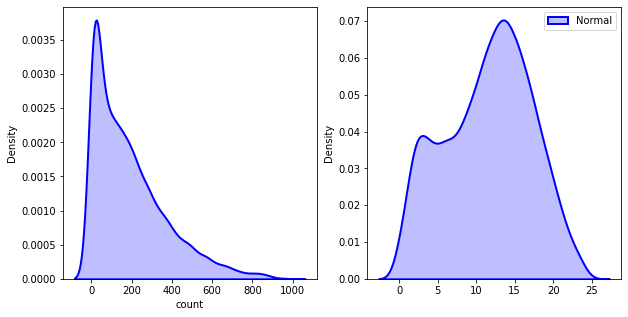

In [ ]:
fig, ax = plt.subplots(1, 2)
# plotting the original data(non-normal) and
# fit_data (normal)
# plt.title('Original \"Count\" features')
sns.distplot(df['count'], hist = False, kde = True,
kde_kws = {'shade': True, 'linewidth': 2},
label = "Non", color ="blue", ax = ax[0])
sns.distplot(fit_data, hist = False, kde = True,
kde_kws = {'shade': True, 'linewidth': 2},
label = "Normal", color ="blue", ax = ax[1])
# adding legends to the subplots
plt.legend(loc = "upper right")
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

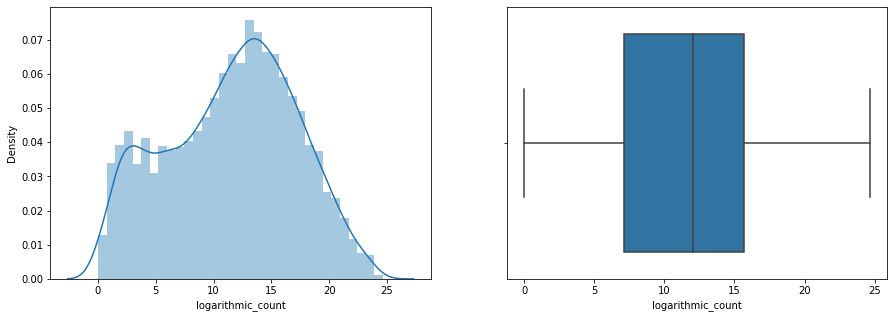

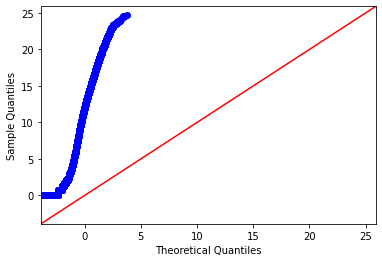

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df['logarithmic_count'])
plt.subplot(1,2,2)
sns.boxplot(df['logarithmic_count'], data=df)
# Normality test for count feature
sm.qqplot(df['logarithmic_count'], line='45')
plt.show()

# **Statistical Hypothesis Test**

**Performing Analysis in the following sub-Categories are as follows:-**


* Hypothesis formulation
* Selection of appropriate test
* Checking test assumptions
* Finding the p-value
* Conclusion based on the p-value


## **Q: Working day has any effect on number of electric cycles rented ?**

### **Null and Alternate Hypothesis**
**2 Sample T-Test**

<ul>
<li>Null Hypothesis (H0) : Workingday has no effect on electric cycles rented</li>
<li>Alternate Hyphothesis (H1) : Workingday has some effect on electric cycles rented.</li>
<li>Significance Level (alpha) : 5%</li>
</ul>

### **Assumptions**

<ul>
<li>Each group is independent</li>
<li>Data in each group are normally distributed.</li>
<li>Data values are continuous.</li>
<li>The variances for the two independent groups are almost equal.</li>
</ul>

### **Get sample from population**

In [ ]:
df.groupby('workingday')['count'].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

In [ ]:
#taking samples after removing outliers.
working=df[(df['workingday']==0) & (df['count']<700)]['count'].sample(2000)
nonworking=df[(df['workingday']==1) & (df['count']<650)]['count'].sample(2000)


#### **Visual Analysis to check assumptions**
#### **Check if sample is normally distributed ?**

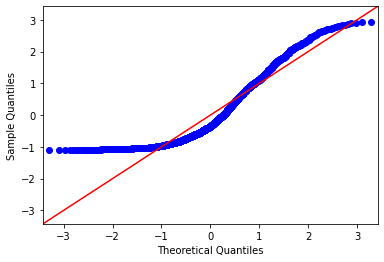

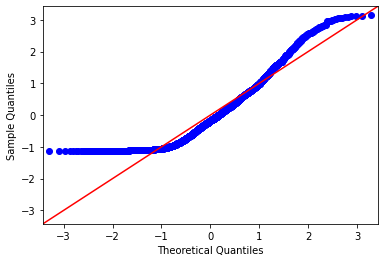

In [ ]:
#To check Normality
sm.qqplot(working, line = "45", fit = True)
sm.qqplot(nonworking, line = "45", fit = True)
plt.show()

### **After Boxcox Transformation.**

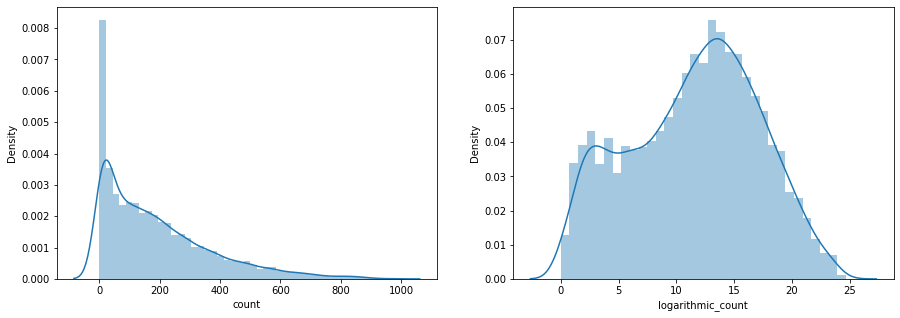

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df['count'])
plt.subplot(1,2,2)
sns.distplot(df['logarithmic_count'])

In [ ]:
s1 = df[df['workingday']==0]['logarithmic_count']
s2 = df[df['workingday']==1]['logarithmic_count']

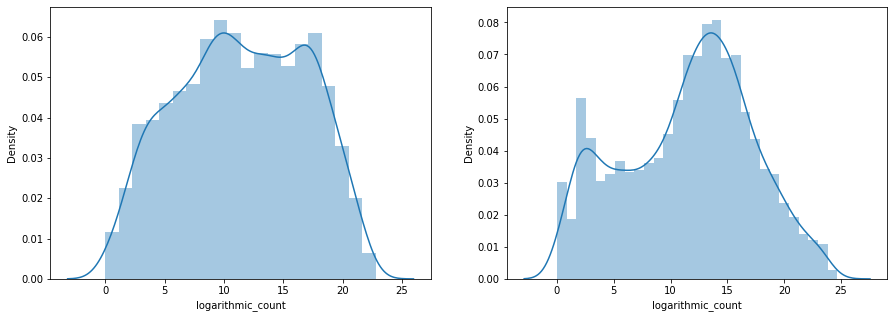

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(s1)
plt.subplot(1,2,2)
sns.distplot(s2)

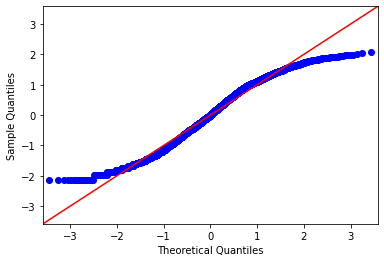

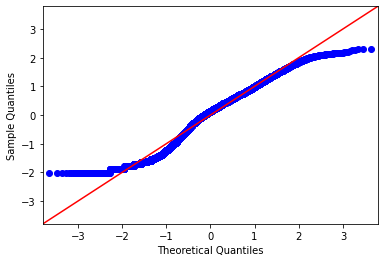

In [ ]:
sm.qqplot(s1, line = "45", fit = True)
sm.qqplot(s2, line = "45", fit = True)
plt.show()

In [ ]:
# Checking the variance
print("Variance of transformed S1", np.var(s1))
print("Variance of transformed S2", np.var(s2))

Variance of transformed S1 29.42592159713769
Variance of transformed S2 32.60811202387167


### **Levene’s Test** -Variance is equal or not

H0 = Equal variance

HA = Not equal variance

Considering Significance level alpha = 5 % (0.05)

In [ ]:
print(levene(working, nonworking))

LeveneResult(statistic=24.968826248735112, pvalue=6.075728610728386e-07)


**The p-value of the test is less than the threshold value of 0.05 So we reject Null Hypothesis. Hence, the sample groups do not have equal variance.**

#### **Shapiro-wilk test** - Data is Normally distributed or not

H0 = The sample comes from a normal distribution.

HA = The sample does not come from normal distribution.

Considering Significance level alpha = 5 % (0.05)

In [ ]:
print(shapiro(working))

ShapiroResult(statistic=0.8876572847366333, pvalue=7.495279575276856e-36)


In [ ]:
print(shapiro(nonworking)) 

ShapiroResult(statistic=0.9094770550727844, pvalue=6.273150499437912e-33)


**The p-value is almost 0.0 and less than the alpha(0.05) so we fail to accept
 the null hypothesis**
**i.e. we have sufficient evidence to say that sample does not come from a normal distribution.**

In [ ]:
# Perform the two sample t-test with equal variances
t_stats, p_value= stats.ttest_ind(s1['count'],s2['count'],equal_var=False)



In [ ]:
def hypothesis_test(p_value):
 if  p_value<= 0.05:
  print('Reject the Null Hypothesis')
 else:
  print('Fail to Reject the Null Hypothesis') 

In [ ]:
p_value

4.5039760554538207e-88

In [ ]:
hypothesis_test(p_value)

Reject the Null Hypothesis


Here, since the p-value is less than alpha = 0.05 so we reject the null hypothesis of the test.

**Workingday has some effect on the cycles rented.**

## **Q: No. of cycles rented similar or different in different weather.**

**ANOVA Test**

### **Null and Alternate Hypothesis**

<ul>
<li>Null Hypothesis (H0) : Weather attribute has no effect on electric cycles rented</li>
<li>Alternate Hyphothesis (H1) : Weather attribute has effect on electric cycles rented.</li>
<li>Significance Level (alpha) : 5%</li>
</ul>

### **Validate the assumptions**

<ul>
<li>Normality – that each sample is taken from a normally distributed population.</li>
<li>Sample independence – that each sample has been drawn independently of the other samples.</li>
<li>Dependent variable should be continuous.</li>
<li>Variance are almost equal.</li>
</ul>

In [ ]:
df.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


In [ ]:
w1=df[df['weather']==1]['count'].sample(800, replace = True).reset_index()
w2=df[df['weather']==2]['count'].sample(800, replace = True).reset_index()
w3=df[df['weather']==3]['count'].sample(800, replace = True).reset_index()

### **Levene’s Test** - Variance is equal or not

H0 = equal variance

HA = Not equal variance

Considering Significance level alpha = 5 % (0.05)

In [ ]:
w1=df[df['weather']==1]['count'].sample(800, replace = True).reset_index()
w2=df[df['weather']==2]['count'].sample(800, replace = True).reset_index()
w3=df[df['weather']==3]['count'].sample(800, replace = True).reset_index()
print(levene(w1['count'], w2['count'], w3['count']))

LeveneResult(statistic=45.289715450296406, pvalue=4.936915672335212e-20)


**The p-value of the test is less than the threshold value of 0.05 and hence, the sample groups do not have equal variance.**

**Check for population variance**

In [ ]:
print(w1['count'].std()**2)
print(w2['count'].std()**2)
print(w3['count'].std()**2)

37629.85729662077
26465.773890801003
19840.02102002503


#### **Check sample is normally distributed ?**

In [ ]:
import statsmodels.api as sm 
# function to check the distribution is gausian or not, if not gausian , do transformation using box cox and output the gausian curve 
def toCheckGuassian(df):
  sns.displot(df, kde = True)
  plt.plot()
  plt.title("distribution of group before applying transformation")
  fig = sm.qqplot(df, line = '45', fit = True)
  plt.plot()
  plt.title("qq plot of group before applying transformation")
  df_t, l = stats.boxcox(df) 
  fig = sm.qqplot(df_t, line = '45', fit = True)
  plt.plot()
  plt.title("qq plot of group after applying transformation")
  sns.displot(df_t, kde = True)
  plt.plot()
  plt.title("distribution of group after applying transformation")
  plt.show()
  return df_t, l

       -Group1-['weather']==1      


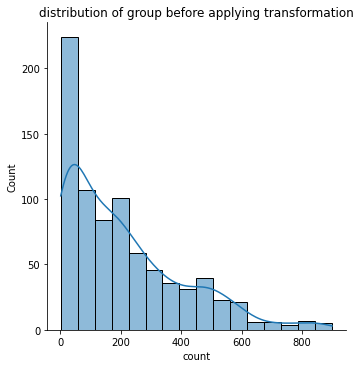

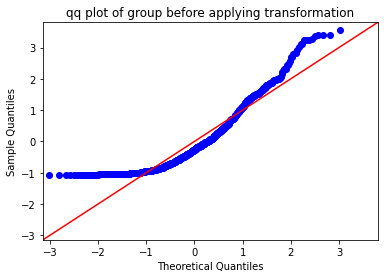

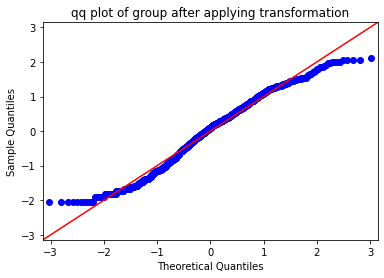

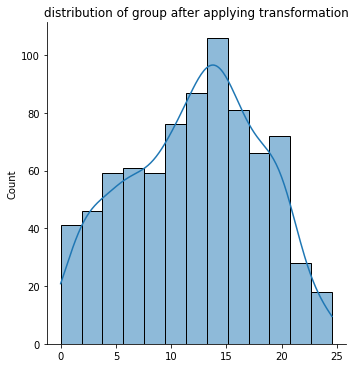

lambda1 :  0.3212205383542201
.      -Group2-['weather']==2      


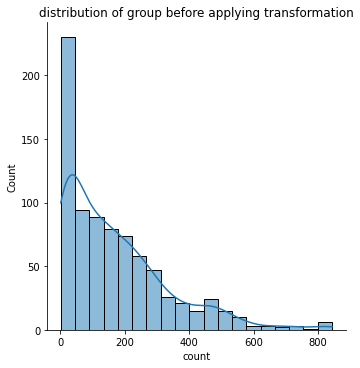

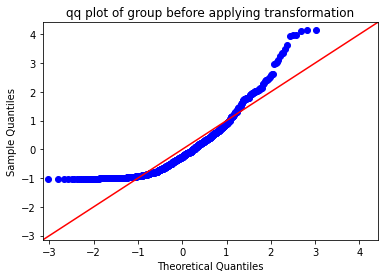

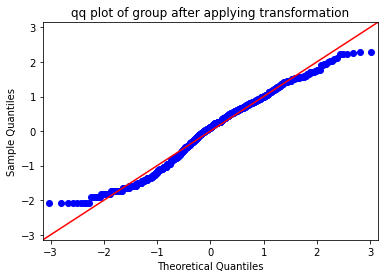

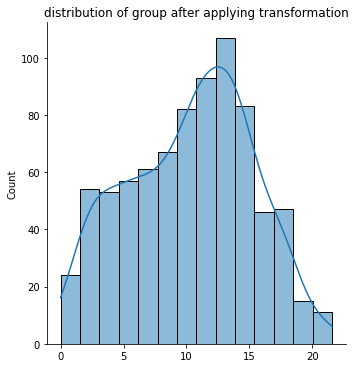

lambda2 :  0.2974043809397457
.      -Group3-['weather']==3      


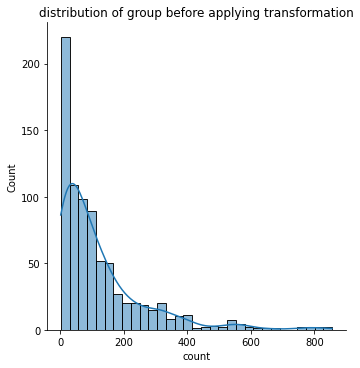

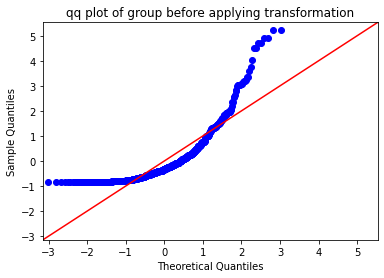

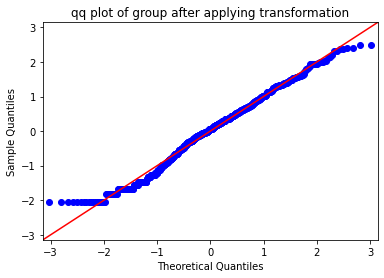

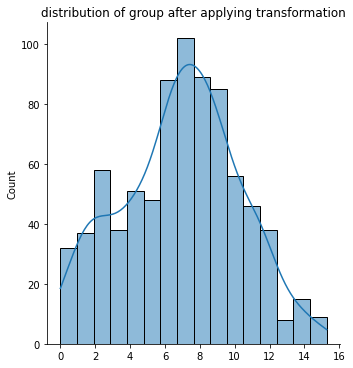

lambda3 :  0.21606906879647045


In [ ]:
print("       -Group1-['weather']==1      ")
df_w1_t, l1 = toCheckGuassian(w1['count'])
print("lambda1 : " , l1)

print(".      -Group2-['weather']==2      ")
df_w2_t, l2 = toCheckGuassian(w2['count'])
print("lambda2 : " , l2)

print(".      -Group3-['weather']==3      ")
df_w3_t, l3 = toCheckGuassian(w3['count'])
print("lambda3 : " , l3)

### **Shapiro Test**- Data is Normally distributed or not

H0 = The sample comes from a normal distribution.

HA = The sample is not coming from normal distribution.

Considering Significance level alpha = 5 % (0.05)

In [ ]:
print(shapiro(w1['count']))

ShapiroResult(statistic=0.8825713396072388, pvalue=3.973311730450941e-24)


we have sufficient evidence to say that sample does not come from a normal
distribution.

In [ ]:
m1 = np.mean(df_w1_t)
s1 = np.std(df_w1_t)
m2 = np.mean(df_w2_t)
s2 = np.std(df_w2_t)
m3 = np.mean(df_w3_t)
s3 = np.std(df_w3_t)

print((m1, s1), (m2,s2), (m3, s3))

(12.074067690932207, 5.921751045079244) (10.279421336047402, 4.954982934245772) (6.899520387154951, 3.373896603021575)


In [ ]:
from scipy.stats import f_oneway
# Assumptions of ANOVA
# 1) Each group observations are gausian or nearly gausian (Distribution nearly looks like gausian after applying transformation)
# 2) Each group variance is roughly the same
# 3) Each observation are independent
# As above conditios met we are applying ANOVA single test

test, p_val = f_oneway(df_w1_t, df_w2_t, df_w3_t )

In [ ]:
p_val

3.2471473184737293e-93

In [ ]:
def hypothesis_testing(p_val):
 if p_val <= 0.05:
  print('Reject the Null Hypothesis')
 else:
  print('Fail to Reject the Null Hypothesis') 

In [ ]:
hypothesis_testing(p_val)

Reject the Null Hypothesis


**So Yulu bikes rental are different in different weathers**

## **Q: No. of cycles rented similar or different in different seasons.**

Null Hypothesis [Ho] - 
Sales of Yulu bikes rental are same for different season.

Alternative Hypothesis [Ha] - 
Sales of Yulu bikes rental are different for different season.

Considering Significance level alpha = 5 % (0.05)

### **Validate the assumptions**

* Normality – that each sample is taken from a normally distributed population.

* Sample independence – that each sample has been drawn independently of the other samples.

* Dependent variable should be continuous.

* Equal Variance.

In [ ]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
df.groupby('season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [ ]:
s1=df[df['season']==1]['count'].sample(2500, replace = True).reset_index()
s2=df[df['season']==2]['count'].sample(2500, replace = True).reset_index()
s3=df[df['season']==3]['count'].sample(2500, replace = True).reset_index()
s4=df[df['season']==4]['count'].sample(2500, replace = True).reset_index()

**Levene’s Test - Variance is equal or not**

H0 = equal variance.

HA = Not equal variance.

In [ ]:
print(levene(s1['count'], s2['count'], s3['count'], s4['count']))

LeveneResult(statistic=149.6780598938901, pvalue=6.91212257954094e-95)


the p-value of the test is less than the threshold value of 0.05 and hence, the sample groups do not have equal variance.

.        Group1= Season 1


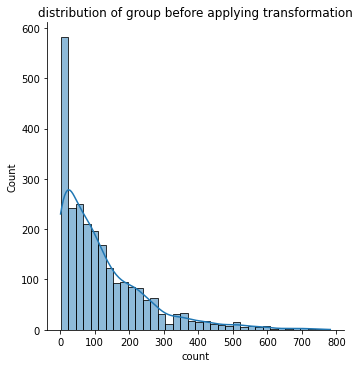

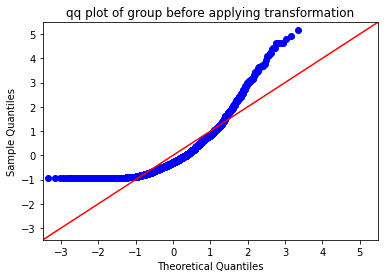

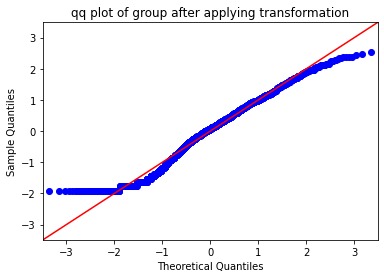

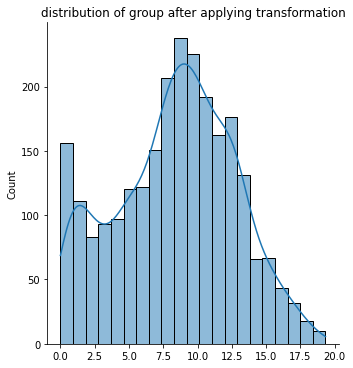

lambda1 :  0.2779667314662153
.        Group2= Season 2


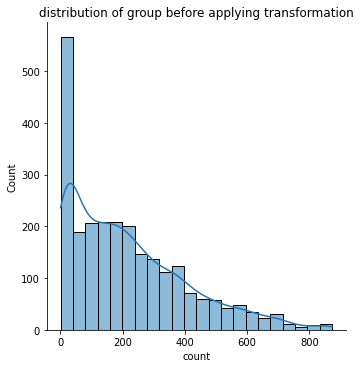

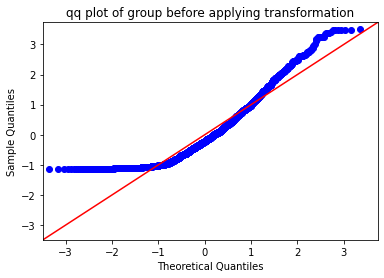

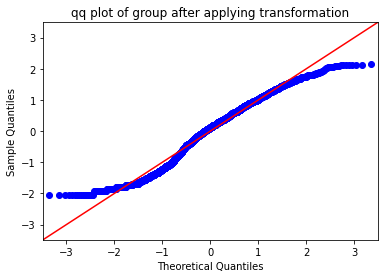

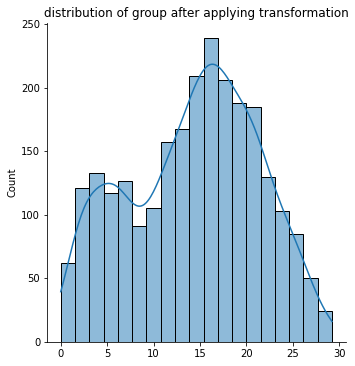

lambda2 :  0.3614262271612329
.        Group3= Season 3


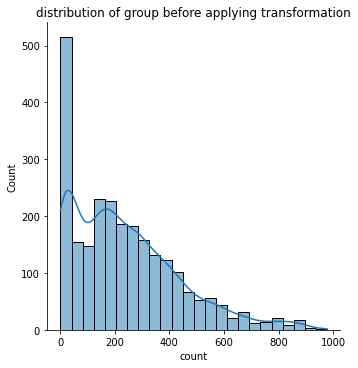

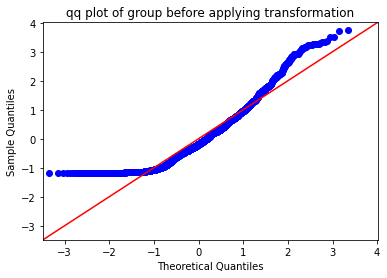

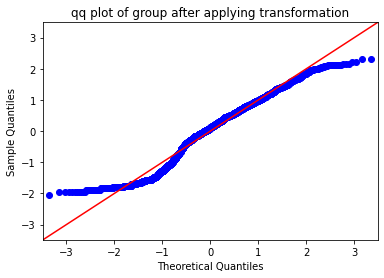

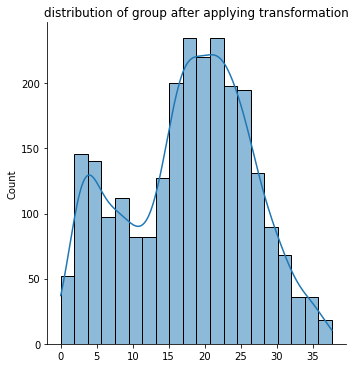

lambda3 :  0.40514399242334753
.        Group4= Season 4


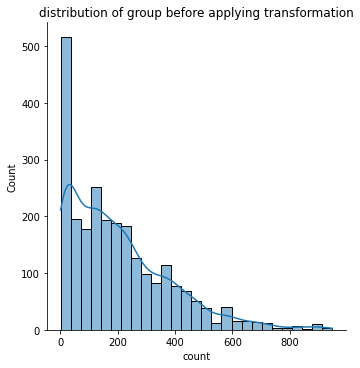

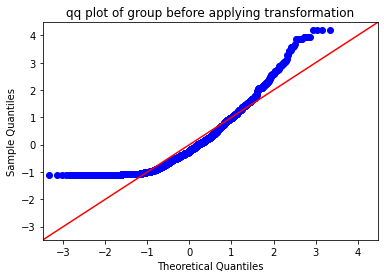

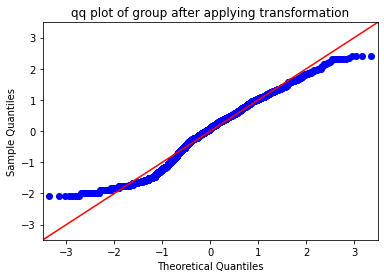

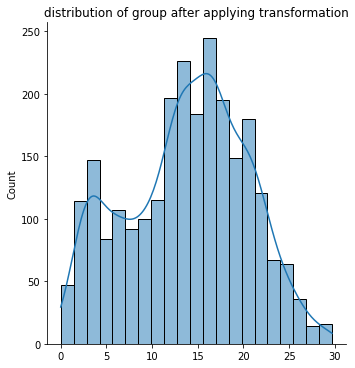

lambda4 :  0.35792954110361624


In [ ]:
print(".        Group1= Season 1")
df_s1_t, l1 = toCheckGuassian(s1['count'])
print("lambda1 : " , l1)

print(".        Group2= Season 2")
df_s2_t, l2 = toCheckGuassian(s2['count'])
print("lambda2 : " , l2)

print(".        Group3= Season 3")
df_s3_t, l3 = toCheckGuassian(s3['count'])
print("lambda3 : " , l3)

print(".        Group4= Season 4")
df_s4_t, l4 = toCheckGuassian(s4['count'])
print("lambda4 : " , l4)

In [ ]:
m1 = np.mean(df_s1_t)
s11 = np.std(df_s1_t)
m2 = np.mean(df_s2_t)
s21 = np.std(df_s2_t)
m3 = np.mean(df_s3_t)
s31 = np.std(df_s3_t)
m4 = np.mean(df_s4_t)
s41 = np.std(df_s4_t)

print((m1, s11), (m2,s21), (m3, s31), (m4, s41))

(8.355594196042421, 4.343150269721778) (14.273678156614595, 6.98724721158496) (17.692136351962343, 8.621736475580748) (13.790638277050583, 6.575277734057843)


In [ ]:
# Assumptions of ANOVA
# 1) Each group observations are gausian or nearly gausian (Distribution nearly looks like gausian after applying transformation)
# 2) Each group variance is roughly the same
# 3) Each observation are independent
# As above conditios met we are applying ANOVA single test

test, p_val= f_oneway(df_s1_t, df_s2_t, df_s3_t, df_s4_t )

In [ ]:
p_val

0.0

In [ ]:
hypothesis_testing(p_val)

Reject the Null Hypothesis


**So Yulu bikes rental are different in different seasons as well.**

## **Q: Weather is dependent on season or Not?**

**Chi - square Test**

H0: The two categorical variables have no relationship (Independent)

Ha: There is a relationship between two categorical variables (Dependent)

Significance Level (alpha) : 5%

**Assumptions**

* Both variables are categorical.
* All observations are independent.
* Cells in the contingency table are mutually exclusive.
* Expected value of cells should be 5 or greater in at least 80% of cells.

In [ ]:
Ht_crosstab = pd.crosstab(df["weather"], df["season"],margins=True)

In [ ]:
Ht_crosstab

season,1,2,3,4,All
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
All,2686,2733,2733,2734,10886


In [ ]:

c , p , dof , expected =stats.chi2_contingency(Ht_crosstab)

In [ ]:
expected

array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03,
        7.19200000e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02,
        2.83400000e+03],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02,
        8.59000000e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01,
        1.00000000e+00],
       [2.68600000e+03, 2.73300000e+03, 2.73300000e+03, 2.73400000e+03,
        1.08860000e+04]])

In [ ]:
p

3.1185273325126814e-05

In [ ]:
hypothesis_test(p)

Reject the Null Hypothesis


**Reject the Null Hypothesis.**

**So Weather is dependent on season.**

# **Observation**

1. Trend of rented cycles is in increasing order(up-trend), there's a dip in the l
ast quarter of year 2011 but from there on it's in up-trend and an again slight di
p in the last quarter of year 2012
2. All seasons in the data is equally distributed.
3. Around 97% of data we have is of non-holiday
4. Around 68% of data we have is of working-day
5. Temp and Atemp don't follow normal distribution and have no outliers.
6. Humdidity is left skewed and has some outliers.
7. Windspeed is right skewed and has some outliers.
8. Count is right skewed, and doesn't follow normal distribution
9. People tend to rent more cycles on working day compared to non-working day
10. People tend to rent more cycles on fall season.

# **Results**

**1) Working Day has some effect on number of electric cycles rented**.

**2) No. of cycles rented are different in different seasons**.

**3) No. of cycles rented are different in different weather**.

**4) Weather is dependent on season**.

# **Recommendations**

1)  Yulu can increase their business by providing attracting offers as the demand is more when feeling temperature is around 31 degree celsius.

2) Yulu can increase their business by providing attracting offers as the demand is more when the windspeed is not there.

3) Yulu can increase their business by providing attracting offers when people come in group of 5 or more members.

4) Yulu can increase their business by increasing rental bikes during Fall season as the demand is more during Fall season. 

5) Yulu can provide attracting offers/discounts to increase their buisness during spring season as the use of rental bikes is less during spring season.

5) Yulu can increase their business by providing more bikes/attracting offers offers/discounts to increase their buisness during holidays.

6) Yulu can increase their business by providing more bikes/attracting offers during working days as the demand is more

7) Yulu can increase their business by increasing rental bikes/attracting offers when the weather is clear.